# Market Basket Analysis

### Loading Required Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

## Data Loading and Cleaning

### Reading Input Files

In [24]:
aisles = pd.read_csv('instacart_2017_05_01/aisles.csv')
departments = pd.read_csv('instacart_2017_05_01/departments.csv')
products = pd.read_csv('instacart_2017_05_01/products.csv')
orders = pd.read_csv('instacart_2017_05_01/orders.csv')
orders_products_train = pd.read_csv('instacart_2017_05_01/order_products__prior.csv')  # We train the model using this data of n-1 orders
orders_products_test = pd.read_csv('instacart_2017_05_01/order_products__train.csv')   # We validate the predictions with this data of nth order

### Data Check
#### (shape, features, unique values and missing values)

In [10]:
print ("Rows     : " ,aisles.shape[0])
print ("Columns  : " ,aisles.shape[1])
print ("\nFeatures : \n" ,aisles.columns.tolist())
print ("\nMissing values :  ", aisles.isnull().sum().values.sum())
print ("\nUnique values :  \n",aisles.nunique())

Rows     :  134
Columns  :  2

Features : 
 ['aisle_id', 'aisle']

Missing values :   0

Unique values :  
 aisle_id    134
aisle       134
dtype: int64


In [11]:
print ("Rows     : " ,departments.shape[0])
print ("Columns  : " ,departments.shape[1])
print ("\nFeatures : \n" ,departments.columns.tolist())
print ("\nMissing values :  ", departments.isnull().sum().values.sum())
print ("\nUnique values :  \n",departments.nunique())

Rows     :  21
Columns  :  2

Features : 
 ['department_id', 'department']

Missing values :   0

Unique values :  
 department_id    21
department       21
dtype: int64


In [12]:
print ("Rows     : " ,products.shape[0])
print ("Columns  : " ,products.shape[1])
print ("\nFeatures : \n" ,products.columns.tolist())
print ("\nMissing values :  ",products.isnull().sum().values.sum())
print ("\nUnique values :  \n",products.nunique())

Rows     :  49688
Columns  :  4

Features : 
 ['product_id', 'product_name', 'aisle_id', 'department_id']

Missing values :   0

Unique values :  
 product_id       49688
product_name     49688
aisle_id           134
department_id       21
dtype: int64


In [15]:
print ("Rows     : " ,orders.shape[0])
print ("Columns  : " ,orders.shape[1])
print ("\nFeatures : \n" ,orders.columns.tolist())
print ("\nMissing values :  ", orders.isnull().sum().values.sum())
print ("\nMissing values :  ", orders.isnull().sum().values)
print ("\nUnique values :  \n",orders.nunique())

Rows     :  3421083
Columns  :  7

Features : 
 ['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']

Missing values :   206209

Missing values :   [     0      0      0      0      0      0 206209]

Unique values :  
 order_id                  3421083
user_id                    206209
eval_set                        3
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
dtype: int64


There are 206,209 missing values in the column 'days_since_prior_order'. This means that these orders are the first orders for the 206,209 unique customers

In [23]:
# Let us see the order count by unique user id

print(orders.groupby('user_id').agg({'order_id' : ['count']}).min(),
      orders.groupby('user_id').agg({'order_id' : ['count']}).max(),
     orders.groupby('user_id').agg({'order_id' : ['count']}).mean(),
     orders.groupby('user_id').agg({'order_id' : ['count']}).median())

order_id  count    4
dtype: int64 order_id  count    100
dtype: int64 order_id  count    16.590367
dtype: float64 order_id  count    10.0
dtype: float64


There are around 10 orders for 75% of the customers and the minimum number of orders per user is 4 and the maximum number of orders per user is 100.

In [16]:
print ("Rows     : " ,orders_products_train.shape[0])
print ("Columns  : " ,orders_products_train.shape[1])
print ("\nFeatures : \n" ,orders_products_train.columns.tolist())
print ("\nMissing values :  ", orders_products_train.isnull().sum().values.sum())
print ("\nUnique values :  \n",orders_products_train.nunique())

Rows     :  32434489
Columns  :  4

Features : 
 ['order_id', 'product_id', 'add_to_cart_order', 'reordered']

Missing values :   0

Unique values :  
 order_id             3214874
product_id             49677
add_to_cart_order        145
reordered                  2
dtype: int64


In [17]:
print ("Rows     : " ,orders_products_test.shape[0])
print ("Columns  : " ,orders_products_test.shape[1])
print ("\nFeatures : \n" ,orders_products_test.columns.tolist())
print ("\nMissing values :  ", orders_products_test.isnull().sum().values.sum())
print ("\nUnique values :  \n",orders_products_test.nunique())

Rows     :  1384617
Columns  :  4

Features : 
 ['order_id', 'product_id', 'add_to_cart_order', 'reordered']

Missing values :   0

Unique values :  
 order_id             131209
product_id            39123
add_to_cart_order        80
reordered                 2
dtype: int64


## Data Merging

In [25]:
merged_data = pd.merge(orders_products_train,orders, on = 'order_id')
merged_data = pd.merge(merged_data,products, on = 'product_id')
merged_data = pd.merge(merged_data,aisles, on = 'aisle_id')
merged_data = pd.merge(merged_data,departments, on = 'department_id')

In [32]:
print ("Rows     : " ,merged_data.shape[0])
print ("Columns  : " ,merged_data.shape[1])
print ("\nMissing values :  ",list(zip(merged_data.columns.tolist(),list(merged_data.isnull().sum().values))))
print ("\nUnique values :  \n",merged_data.nunique())

Rows     :  32434489
Columns  :  15

Missing values :   [('order_id', 0), ('product_id', 0), ('add_to_cart_order', 0), ('reordered', 0), ('user_id', 0), ('eval_set', 0), ('order_number', 0), ('order_dow', 0), ('order_hour_of_day', 0), ('days_since_prior_order', 2078068), ('product_name', 0), ('aisle_id', 0), ('department_id', 0), ('aisle', 0), ('department', 0)]

Unique values :  
 order_id                  3214874
product_id                  49677
add_to_cart_order             145
reordered                       2
user_id                    206209
eval_set                        1
order_number                   99
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
product_name                49677
aisle_id                      134
department_id                  21
aisle                         134
department                     21
dtype: int64


## Data Exploration

We will look at if the orders peak on a particular day of the week

In [39]:
orderperday = merged_data.groupby('order_dow').agg({'order_id' : ['count']}).reset_index()

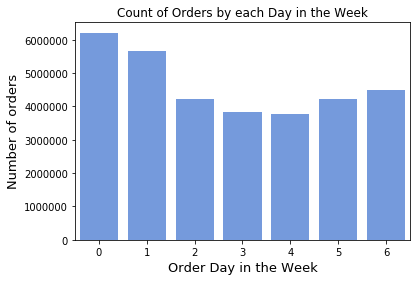

In [74]:
orderperday.columns = ['Day_Week','Orders']
sns.barplot(x='Day_Week', y='Orders',data=orderperday, color='cornflowerblue')
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Order Day in the Week', fontsize=13)
plt.title('Count of Orders by each Day in the Week');

We see that most of the orders are placed on day = 0

In [59]:
orderperhour = merged_data.groupby('order_hour_of_day').agg({'order_id' : ['count']}).reset_index()

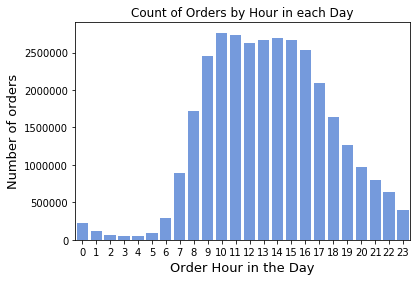

In [75]:
orderperhour.columns = ['Day_hour','Orders']
sns.barplot(x='Day_hour', y='Orders',data=orderperhour, color='cornflowerblue')
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Order Hour in the Day', fontsize=13)
plt.title('Count of Orders by Hour in each Day');

The ordering picks up from 7AM in the morning and peaks during the hours 9AM to 4PM, before it starts decreasing again.